## 数式処理システムって何
数式処理システムCoCalcと言われても、「数式システム」って何と思われる方が多いのではないでしょうか。

私たちが日常で使う電卓と比べてみましょう。電卓で以下のように入力してみます。

```
1/2+1/3=0.833333333333333
```

Macの「計算機」で実行してみます。

電卓では、計算の途中結果を二進数（bit）で行なっています。
最初に1/2の結果0.5を計算して、次に1/3の結果0.333333333333333を計算して、その和を求めます。
そして0.833333333333333の結果を返します。
<img src="images/cal.png" width="300px"/>


## CoCalcで計算
それでは、数式システムCoCalcで同じ計算を行なってみましょう。

In [1]:
1/2 + 1/3

5/6

数式システムでは5/6の分数で答えが返されました。数式システムでは1/2+1/3の計算を式の通り計算しています。

分数の計算は、分母を同じ値6に通分してから足し算をします。

$$
\frac{1}{2} + \frac{1}{3} = \frac{2}{6} + \frac{3}{6} = \frac{5}{6}
$$

計算結果を数値に表すには、N関数を使用します。引数のdigits=nで有効桁数を指定できます。

以下の例では5/6を有効桁数３２まで計算しています。

In [2]:
N(1/2+1/3, digits=32)

0.83333333333333333333333333333333

### 大きな桁の計算
通常のプログラミング言語のプリミティブ型で表現できる有効桁数は固定です。

例えばMacの科学計算電卓を使って$8^{64}$を計算すると以下のように計算されます。

<img src="images/8_power_of_64.png" width="400px"/>

最後e57という値は、$10^{57}$を表しているので、小数点のあとに５７桁分の値があるのですが、そのうちの１５桁しか計算できていないのです。
$$
6.277101735386685 \times 10^{57}
$$

これを数式システムCoCalcで計算するとすべての値を求めることができます。

皆さんは、プログラミングができれば何でも計算できると思っていたと思いますが、それは正確な値ではなくある制限のもとで計算された概算値だということです。

科学や技術の進歩に伴い、計算に要求される精度も向上しています。

In [3]:
8^64

6277101735386680763835789423207666416102355444464034512896

## 可視化
可視化と言われてもピンとこないと思いますが、中学で習った関数のグラフを思い出して見てください。
関数がどんな形をしているのか、ｘの値を変えながら同じ計算を何度も繰り返したと思います。

数式システムCoCalcの可視化はとても強力です。

変数xとyの間に以下のような関係がある場合を考えて見てください。
$$
y^2= x^3 + \frac{1}{10}x + 10
$$

通常、グラフを書くには、ｘからyを求めなくてなりませんが、CoCalcでは関係式のままグラフを表示することができます。

まずは、xとyの変数をvar関数で定義し、変数eqに上記の関係を代入します。show関数を使うと関係式eqを綺麗に表示してくれます。

In [4]:
var('x y')

eq = y^2 == x^3 + 1/10*x + 10
show(eq)

y^2 == x^3 + 1/10*x + 10

次に、implicit_plot関数を使ってeqのグラフをｘとyをそれぞれ-10から10の範囲でプロットします。
たったこれだけで複雑な関数のグラフを表示することができます。

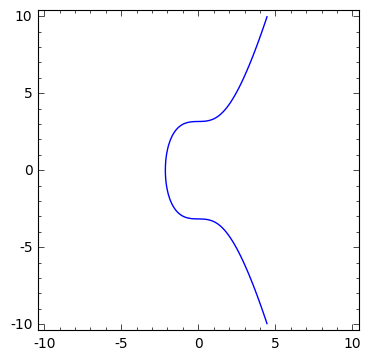

In [5]:
implicit_plot(eq, [x,-10, 10], [y, -10, 10], figsize=5)

### 極値を計算
数式処理システムの可視化の特徴として、ちょっと面白い関数のグラフを表示してみましょう。

x=0での以下の関数の値はsin(0)が0ですから、0割る0で不定（求まらない）のはずですが、CoCalcでxを$-4\pi$から$4\pi$の範囲でプロットしてみましょう。

$$
\frac{sin(x)}{x}
$$



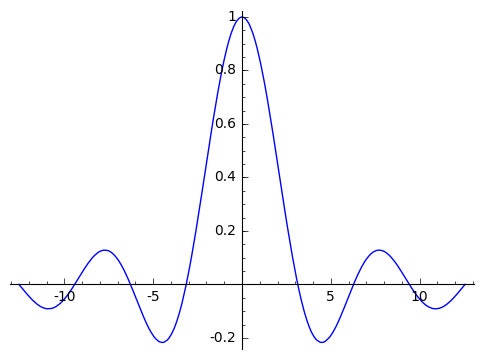

In [6]:
plot(sin(x)/x, [x, -4*pi, 4*pi], figsize=5)

x=0の値が１となり、そてもなめらかな曲線となっています。

これは、sin(x)/xのx=0の極値を計算しているので、不定値ではなく１の値を正しく計算しています。

変数fにsin(x)/xの式を代入して、limitメソッドを使ってx=0の値を求めてみると、期待通り１となります。

In [7]:
f = sin(x)/x
f.limit(x=0)

1